In [51]:
import random

import os
import shutil
import numba
from random import randint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import linalg
from scipy import fftpack
from scipy import stats
from sklearn.preprocessing import normalize, MinMaxScaler
import scipy.signal as sgn
import scipy.misc

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# precision-recall curve and f1

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from scipy import stats, linalg

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#Data import
ConnectionTable = pd.read_csv("/Users/David/Desktop/output/ConTabStd.csv",
                             sep = ',')
ConnectionTable.set_index('Neuron_Pair', inplace=True)
  
ConnectionTable = ConnectionTable.drop(columns="Unnamed: 0", axis =1)
ConnectionTable.head(100)      

,Dataset,Mutual_Information_Conditional,GrangerF,PartialCorrDisc,PartialCorrCont,ConnectionPresent,ConnectionType,Distance
Neuron_Pair,,,,,,,,
01-000-001,1,-0.666548,-0.500759,0.969341,2.430755,absent,none,0.110386
01-000-002,1,-0.547945,-0.291519,-1.311035,-0.205949,absent,none,0.434014
01-000-003,1,-0.779080,-0.557135,-0.240551,-0.256225,absent,none,0.453296
01-000-004,1,-0.569620,-0.480993,-0.299473,-0.232301,absent,none,0.266295
01-000-005,1,-0.458945,-0.495165,0.333799,0.118983,absent,none,0.179324
...,...,...,...,...,...,...,...,...
01-000-096,1,-0.863554,-0.306625,0.144678,-0.022841,present,excitatory,0.613329
01-000-097,1,-0.500311,-0.389191,-0.125301,-0.212394,absent,none,0.345485
01-000-098,1,-0.935647,-0.219806,0.689343,-0.449760,absent,none,0.349116


Text(0, 0.5, 'Count')

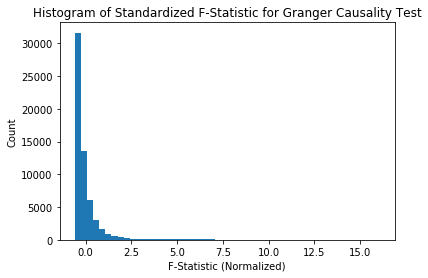

In [3]:
plt.hist(ConnectionTable["GrangerF"], bins = 50)
plt.title("Histogram of Standardized F-Statistic for Granger Causality Test")
plt.xlabel("F-Statistic (Normalized)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

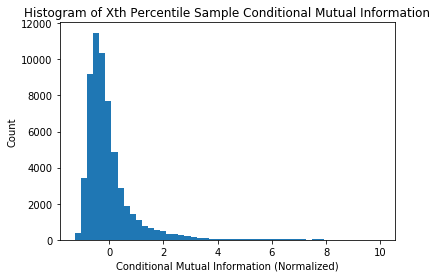

In [4]:
plt.hist(ConnectionTable["Mutual_Information_Conditional"], bins = 50)
plt.title("Histogram of Sample Conditional Mutual Information")
plt.xlabel("Conditional Mutual Information (Normalized)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

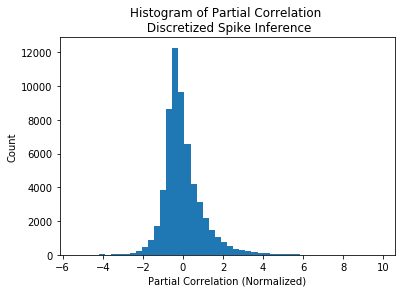

In [5]:
plt.hist(ConnectionTable["PartialCorrDisc"], bins = 50)
plt.title("Histogram of Partial Correlation \n Discretized Spike Inference")
plt.xlabel("Partial Correlation (Normalized)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

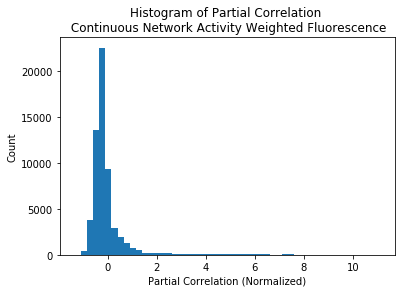

In [6]:
plt.hist(ConnectionTable["PartialCorrCont"], bins = 50)
plt.title("Histogram of Partial Correlation \n Continuous Network Activity Weighted Fluorescence")
plt.xlabel("Partial Correlation (Normalized)")
plt.ylabel("Count")

In [54]:
# Connection / No Connection Data Split

features = pd.get_dummies(ConnectionTable)
labels = np.array(features['ConnectionPresent_present'])

features= features.drop(['ConnectionType_inhibitory', 
                         "ConnectionType_excitatory",
                         "ConnectionType_none",
                         "ConnectionPresent_present",
                        "ConnectionPresent_absent",
                        "Dataset"], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.15, 
                                                                            random_state = 1618)



Confusion Matrix
[[7471  295]
 [ 723  421]]


               precision    recall  f1-score   support

No Connection       0.91      0.96      0.94      7766
   Connection       0.59      0.37      0.45      1144

     accuracy                           0.89      8910
    macro avg       0.75      0.67      0.69      8910
 weighted avg       0.87      0.89      0.87      8910



Text(0, 0.5, 'True Positive Rate')

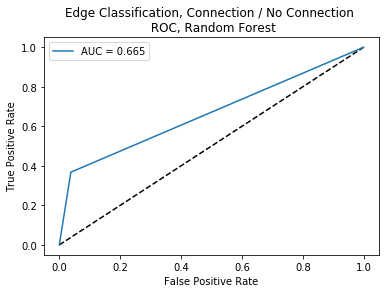

In [8]:
# Connection / No Connection Random Forest
rf = RandomForestClassifier(n_estimators = 100, 
                            random_state = 1618)

rf.fit(train_features, train_labels)

test_pred = rf.predict(test_features)


#Report
class_labels = {0: "No Connection",
               1: "Connection"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["No Connection", "Connection"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Connection / No Connection \n ROC, Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")



/miniconda3/envs/connectomics/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)




Confusion Matrix
[[7662  104]
 [ 875  269]]


               precision    recall  f1-score   support

No Connection       0.90      0.99      0.94      7766
   Connection       0.72      0.24      0.35      1144

     accuracy                           0.89      8910
    macro avg       0.81      0.61      0.65      8910
 weighted avg       0.87      0.89      0.86      8910



Text(0, 0.5, 'True Positive Rate')

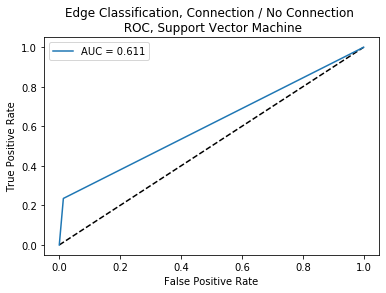

In [9]:
# Connection / No Connection SVM

svm = SVC(kernel = "rbf")
svm.fit(train_features, train_labels)

test_pred = svm.predict(test_features)


# Report
class_labels = {0: "No Connection",
               1: "Connection"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["No Connection", "Connection"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Connection / No Connection \n ROC, Support Vector Machine")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")




Confusion Matrix
[[7495  271]
 [ 768  376]]


               precision    recall  f1-score   support

No Connection       0.91      0.97      0.94      7766
   Connection       0.58      0.33      0.42      1144

     accuracy                           0.88      8910
    macro avg       0.74      0.65      0.68      8910
 weighted avg       0.87      0.88      0.87      8910



Text(0, 0.5, 'True Positive Rate')

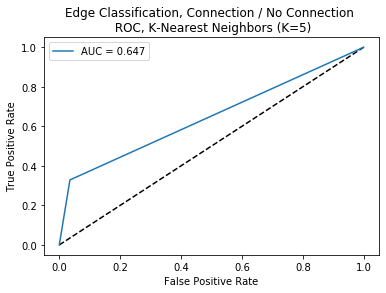

In [10]:
# Connection / No Connection KNN
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(train_features, train_labels)

test_pred = KNN.predict(test_features)


# Report
class_labels = {0: "No Connection",
               1: "Connection"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["No Connection", "Connection"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Connection / No Connection \n ROC, K-Nearest Neighbors (K=5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")



Confusion Matrix
[[7733  286]
 [ 605  286]]


                precision    recall  f1-score   support

Non-Excitatory       0.93      0.96      0.95      8019
    Excitatory       0.50      0.32      0.39       891

      accuracy                           0.90      8910
     macro avg       0.71      0.64      0.67      8910
  weighted avg       0.88      0.90      0.89      8910



Text(0, 0.5, 'True Positive Rate')

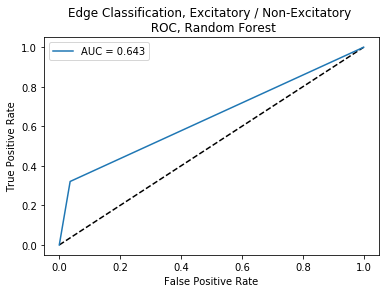

In [12]:
# Excitatory / Non-Excitatory Random Forest
rf = RandomForestClassifier(n_estimators = 100, 
                            random_state = 1618)

rf.fit(train_features, train_labels)

test_pred = rf.predict(test_features)


#Report
class_labels = {0: "Non-Excitatory",
               1: "Excitatory"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["Non-Excitatory", "Excitatory"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Excitatory / Non-Excitatory \n ROC, Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

/miniconda3/envs/connectomics/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)




Confusion Matrix
[[7926   93]
 [ 716  175]]


                precision    recall  f1-score   support

Non-Excitatory       0.92      0.99      0.95      8019
    Excitatory       0.65      0.20      0.30       891

      accuracy                           0.91      8910
     macro avg       0.79      0.59      0.63      8910
  weighted avg       0.89      0.91      0.89      8910



Text(0, 0.5, 'True Positive Rate')

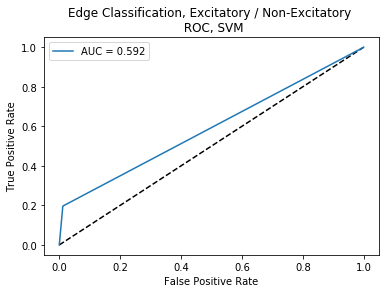

In [13]:
# Excitatory / Non-Excitatory SVM

svm = SVC(kernel = "rbf")
svm.fit(train_features, train_labels)

test_pred = svm.predict(test_features)

#Report
class_labels = {0: "Non-Excitatory",
               1: "Excitatory"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["Non-Excitatory", "Excitatory"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Excitatory / Non-Excitatory \n ROC, SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")





Confusion Matrix
[[7786  233]
 [ 628  263]]


                precision    recall  f1-score   support

Non-Excitatory       0.93      0.97      0.95      8019
    Excitatory       0.53      0.30      0.38       891

      accuracy                           0.90      8910
     macro avg       0.73      0.63      0.66      8910
  weighted avg       0.89      0.90      0.89      8910



Text(0, 0.5, 'True Positive Rate')

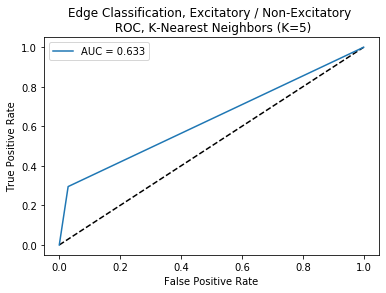

In [14]:
# Excitatory / Non-Excitatory KNN

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(train_features, train_labels)

test_pred = KNN.predict(test_features)


#Report
class_labels = {0: "Non-Excitatory",
               1: "Excitatory"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["Non-Excitatory", "Excitatory"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Excitatory / Non-Excitatory \n ROC, K-Nearest Neighbors (K=5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [15]:
# Exhibitory / Inhibitory Data Split
# Connection Type from KNOWN CONNECTIONS
# ie only distinguishing type of connection

ConTab = ConnectionTable[ConnectionTable.ConnectionType!='none']
features = pd.get_dummies(ConTab)
labels = np.array(features['ConnectionType_excitatory'])

features= features.drop(['ConnectionType_inhibitory', 
                         "ConnectionType_excitatory",
                        "ConnectionPresent_present"], 
                        axis = 1)
feature_list = list(features.columns)
features = np.array(features)
#features.to_csv("conn_features.csv", delimiter=",")

train_features, test_features, train_labels, test_labels = train_test_split(features, 
                                                                            labels, 
                                                                            test_size = 0.15, 
                                                                            random_state = 1618)




Confusion Matrix
[[ 24 186]
 [ 44 871]]


              precision    recall  f1-score   support

  Inhibitory       0.35      0.11      0.17       210
  Excitatory       0.82      0.95      0.88       915

    accuracy                           0.80      1125
   macro avg       0.59      0.53      0.53      1125
weighted avg       0.74      0.80      0.75      1125



Text(0, 0.5, 'True Positive Rate')

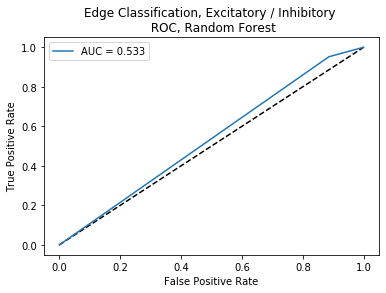

In [16]:
# Excitatory / Non-Excitatory Random Forest
rf = RandomForestClassifier(n_estimators = 100, 
                            random_state = 1618)

rf.fit(train_features, train_labels)

test_pred = rf.predict(test_features)

#Report
class_labels = {0: "Inhibitory",
               1: "Excitatory"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["Inhibitory", "Excitatory"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Excitatory / Inhibitory \n ROC, Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")



/miniconda3/envs/connectomics/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)




Confusion Matrix
[[  0 210]
 [  0 915]]


              precision    recall  f1-score   support

  Inhibitory       0.00      0.00      0.00       210
  Excitatory       0.81      1.00      0.90       915

    accuracy                           0.81      1125
   macro avg       0.41      0.50      0.45      1125
weighted avg       0.66      0.81      0.73      1125



/miniconda3/envs/connectomics/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'True Positive Rate')

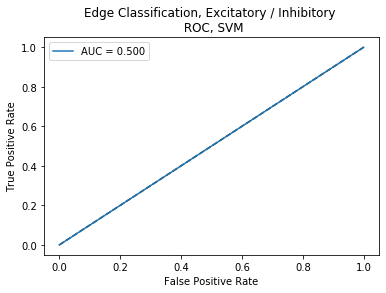

In [17]:
# Excitatory / Inhibitory SVM

svm = SVC(kernel = "rbf")
svm.fit(train_features, train_labels)

test_pred = svm.predict(test_features)

#Report
class_labels = {0: "Inhibitory",
               1: "Excitatory"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["Inhibitory", "Excitatory"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Excitatory / Inhibitory \n ROC, SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")








Confusion Matrix
[[ 23 187]
 [ 62 853]]


              precision    recall  f1-score   support

  Inhibitory       0.27      0.11      0.16       210
  Excitatory       0.82      0.93      0.87       915

    accuracy                           0.78      1125
   macro avg       0.55      0.52      0.51      1125
weighted avg       0.72      0.78      0.74      1125



Text(0, 0.5, 'True Positive Rate')

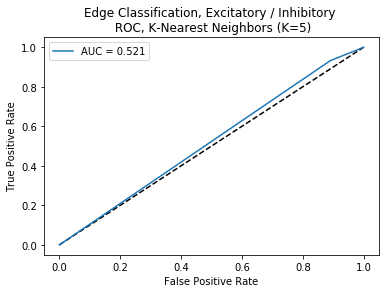

In [18]:
# Excitatory / Inhibitory KNN

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(train_features, train_labels)

test_pred = KNN.predict(test_features)

#Report
class_labels = {0: "Inhibitory",
               1: "Excitatory"}
print("\n")
print("Confusion Matrix")
print(confusion_matrix(test_labels, test_pred))
print("\n")

report = classification_report(test_labels, test_pred, target_names = ["Inhibitory", "Excitatory"])
print(report)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(test_labels, test_pred)
auc = sklearn.metrics.roc_auc_score(test_labels, test_pred)

# plot results
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "AUC = {:.3f}".format(auc))
plt.legend(loc="best")
plt.title("Edge Classification, Excitatory / Inhibitory \n ROC, K-Nearest Neighbors (K=5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


In [19]:
################################

In [26]:
ConnectionTable.head()

,Dataset,Mutual_Information_Conditional,GrangerF,PartialCorrDisc,PartialCorrCont,ConnectionPresent,ConnectionType,Distance
Neuron_Pair,,,,,,,,
01-000-001,1,-0.666548,-0.500759,0.969341,2.430755,absent,none,0.110386
01-000-002,1,-0.547945,-0.291519,-1.311035,-0.205949,absent,none,0.434014
01-000-003,1,-0.779080,-0.557135,-0.240551,-0.256225,absent,none,0.453296
01-000-004,1,-0.569620,-0.480993,-0.299473,-0.232301,absent,none,0.266295
01-000-005,1,-0.458945,-0.495165,0.333799,0.118983,absent,none,0.179324


In [44]:
# PCA
ConTab = ConnectionTable.copy()
ConTab.reset_index(drop=True, inplace=True)
features = ["Mutual_Information_Conditional",
           "GrangerF",
           "PartialCorrDisc",
           "PartialCorrCont"]
x = ConTab.loc[:, features].values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

PCdf = pd.DataFrame(data = principalComponents, 
                           columns = ['PC1', 'PC2'])
PCdf.reset_index(drop=True, inplace=True)

PC_labeled = pd.concat([PCdf, ConTab['ConnectionPresent']], axis=1)


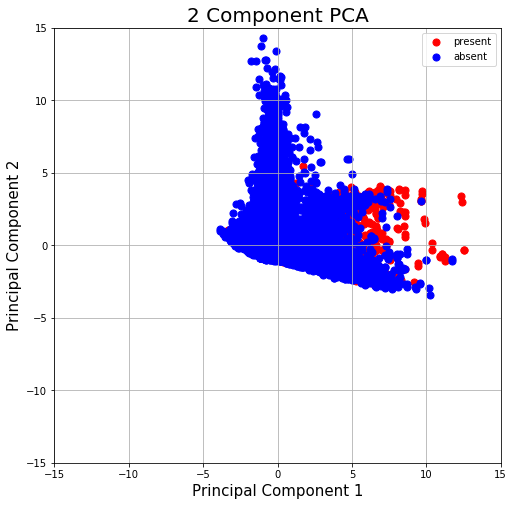

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['present', 'absent']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = PC_labeled['ConnectionPresent'] == target
    ax.scatter(PC_labeled.loc[indicesToKeep, 'PC1'], 
               PC_labeled.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

,Mutual_Information_Conditional,GrangerF,PartialCorrDisc,PartialCorrCont
Mutual_Information_Conditional,1.000000,0.170689,0.279616,0.176061
GrangerF,0.170689,1.000000,-0.097709,-0.061644
PartialCorrDisc,0.279616,-0.097709,1.000000,0.385523
PartialCorrCont,0.176061,-0.061644,0.385523,1.000000


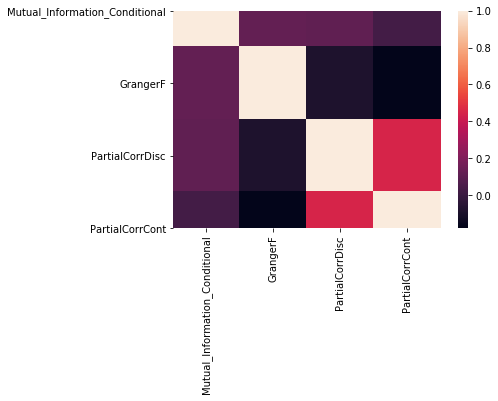

In [85]:
variables = ConnectionTable[["Mutual_Information_Conditional",
           "GrangerF",
           "PartialCorrDisc",
           "PartialCorrCont"]]
VarCorr = variables.corr(method = "spearman")
sns.heatmap(VarCorr)
variables.corr()